<a href="https://colab.research.google.com/github/dariakrtn/AI_2022/blob/main/hw_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1: В папке находится изображение railway.jpeg с железной дорогой,
уходящей вдаль от камеры. Необходимо, используя перспективное преобразование,
развернуть дорогу таким образом, чтобы она была непосредственно перед нами.

Пример результата с подсказкой содержит изображение railway_result.png.
Подсказка 2: чтобы было легче определять координаты ключевых точек изображения,
отобразите его с помощью plt.imshow(img) (!не в ноутбуке) - в правом нижнем углу открытого окна будут отображаться координаты пикселей, на которые Вы наводите мышкой.


In [203]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

(1333, 1000, 3)

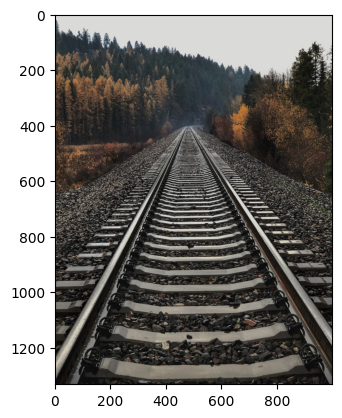

In [204]:
img = cv.imread('railway.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

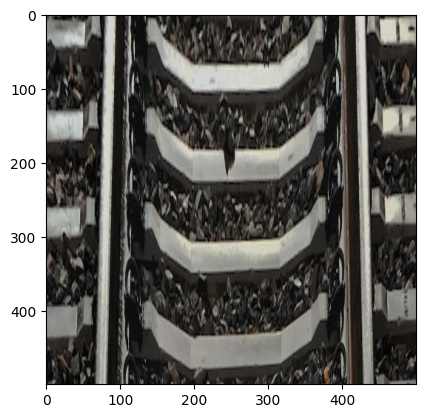

In [205]:
pts1 = np.float32([[150, 790],[50, 950],
                    [850, 780], [980, 950]])
pts2 = np.float32([[0, 0], [0, 500],
                       [500, 0], [500, 500]])

# Применила алгоритм перспективного преобразования
matrix = cv.getPerspectiveTransform(pts1, pts2)
result = cv.warpPerspective(img, matrix, (500, 500))

plt.imshow(result)

Задание 2: В папке находится изображение palm.png с пальмой.
Используя классические аффинные преобразования, необходимо создать "тень"
для этой пальмы и отрисовать ее с ней на одном рисунке.
Пример результата находится в изображении palm_result.png


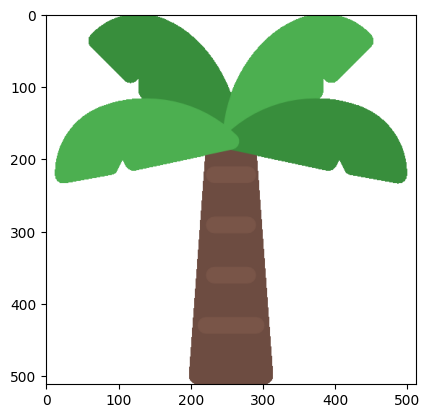

In [210]:
palm = cv.imread("palm.png")
palm = cv.cvtColor(palm, cv.COLOR_BGR2RGB)

plt.imshow(palm)

In [211]:
h, w = palm.shape[:2]
w *= 2

In [224]:
pts1 = np.float32([[0, 0],[0, 512],
                    [512, 0], [512, 512]])
pts2 = np.float32([[800, 300], [0, 512],
                       [1212, 300], [512, 512]])

# Применила алгоритм перспективного преобразования
matrix = cv.getPerspectiveTransform(pts1, pts2)
palm_final = cv.warpPerspective(palm, matrix, (1212, 512))

palm_final = np.where(palm_final == 0, 255, palm_final)
palm_final = np.where(palm_final != 255, 0, palm_final)

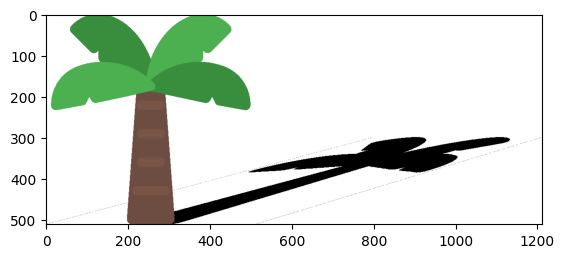

In [225]:
#слияние изображений
for x in range(palm.shape[0]):
    for y in range(palm.shape[1]):
        if (palm[x,y] != 255).any():
            palm_final[x,y] = palm[x,y]

plt.imshow(palm_final, cmap="gray")